<a href="https://colab.research.google.com/github/mag381/AI/blob/main/Calif_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb

In [ ]:
# 真値を予測値に対してプロットする
def cmp_plt(y_train_yosoku, y_train, y_test_yosoku, y_test):
  plt.scatter(y_train_yosoku, y_train, label="train")
  plt.scatter(y_test_yosoku, y_test, label="test")
  plt.xlabel("yosoku")
  plt.ylabel("shin-chi")
  plt.title("Hikaku")
  plt.legend()
  plt.show()

In [ ]:
# 外れ量（予測値－真値）を予測値に対してプロットする
def res_plt(y_train_yosoku, y_train, y_test_yosoku, y_test):
  plt.scatter(y_train_yosoku, y_train_yosoku - y_train, label="train")
  plt.scatter(y_test_yosoku, y_test_yosoku - y_test, label="test")
  plt.xlabel("yosoku")
  plt.ylabel("yosoku - sinchi")
  plt.title("Yosoku_Hazure")
  plt.legend()
  plt.show()

In [ ]:
# 予測誤差を評価する
def get_eval_score(y_correct,y_yosoku):
  mae = mean_absolute_error(y_correct,y_yosoku)
  mse = mean_squared_error(y_correct,y_yosoku)
  rmse = np.sqrt(mse)
  r2score = r2_score(y_correct,y_yosoku)
  print(f" mean absolute error = {mae}")
  print(f" mean squared error = {mse}")
  print(f" root mean squared error = {rmse}")
  print(f" R2(kettei keisuu) = {r2score}")

In [ ]:
#物件を保存したファイル読み込む
from google.colab import files     #2 PC上のファイルを選択して、
uploaded=files.upload()            #2 Colab上のに読み込んでいる。（上の行とセットで使う）
f_name = list(uploaded.keys())[0]  #2 上の行で選択したファイル名を f_nameに代入する
# housing01.csv を読み込む

Saving housing01.csv to housing01.csv


In [ ]:
# 指定したファイルをデータフレーム(DataFrame：変数名df）に格納する
# セパレート記号を'\t'に設定して読み込む
df = pd.read_csv(f_name, encoding='utf-8-sig') 
df.head()  # 最初の5行を表示する

,long.,lat.,age,rooms,b_rooms,population,households,median_income,house_value
0,-122.23,37.88,41,6.984127,1.023810,2.555556,126,8.3252,452600
1,-122.22,37.86,21,6.238137,0.971880,2.109842,1138,8.3014,358500
2,-122.24,37.85,52,8.288136,1.073446,2.802260,177,7.2574,352100
3,-122.25,37.85,52,5.817352,1.073059,2.547945,219,5.6431,341300
4,-122.25,37.85,52,6.281853,1.081081,2.181467,259,3.8462,342200


In [ ]:
# 使わないコラム（columns）を drop で削除する
#df = df.drop(['title','address','fee','manage','access11','access21','access22','access31','access32'], axis=1)
#df.head()  # 削除後、最初の5行を表示
# 使わないコラムはあらかじめ削除したので実行しない

In [ ]:
df.describe()  # データ個数、平均値、標準偏差、最小値、25,50,75%での値、最大値を表示

,long.,lat.,age,rooms,b_rooms,population,households,median_income,house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,5.429000,1.086060,3.070655,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2.474173,0.486160,10.386050,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,0.846154,0.000000,0.692308,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,4.440716,1.004393,2.429741,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,5.229129,1.048029,2.818116,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,6.052381,1.098851,3.282261,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,141.909091,34.066667,1243.333333,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(*args, **kw)>

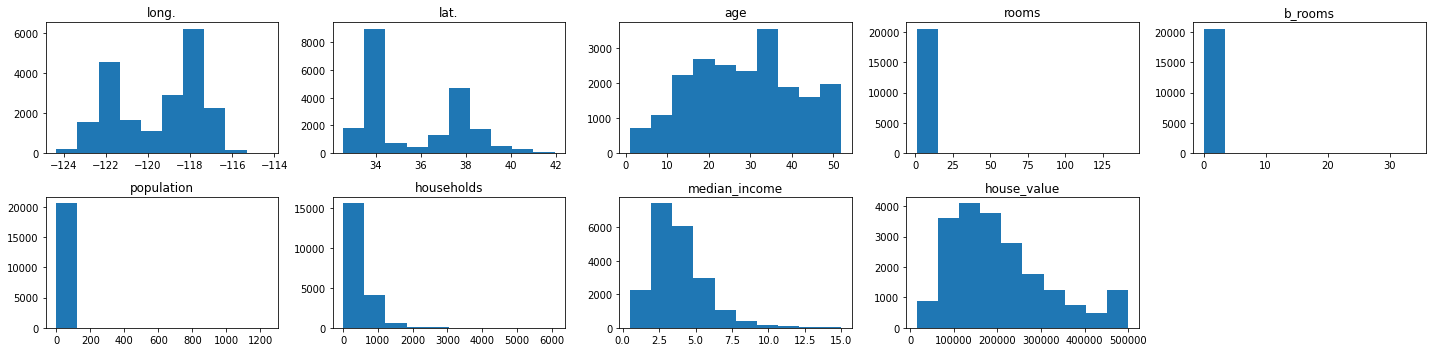

In [ ]:
# 各 columns のヒストグラムを表示する
plt.figure(figsize=(20,5))
for i, col in enumerate(df.columns):
  plt.subplot(2,5,i+1)
  plt.hist(df[col])
  plt.title(col)
plt.tight_layout()
plt.show

In [ ]:
# 相関係数を計算して df_corr に代入し、表示
df_corr = df.corr()  
display(df_corr)

,long.,lat.,age,rooms,b_rooms,population,households,median_income,house_value
long.,1.000000,-0.924664,-0.108197,-0.027540,0.011896,0.002476,0.055310,-0.015176,-0.045967
lat.,-0.924664,1.000000,0.011173,0.106389,0.069324,0.002366,-0.071035,-0.079809,-0.144160
age,-0.108197,0.011173,1.000000,-0.153277,-0.076713,0.013191,-0.302916,-0.119034,0.105623
rooms,-0.027540,0.106389,-0.153277,1.000000,0.827762,-0.004852,-0.080598,0.326895,0.151948
b_rooms,0.011896,0.069324,-0.076713,0.827762,1.000000,-0.005832,-0.054092,-0.059805,-0.045163
population,0.002476,0.002366,0.013191,-0.004852,-0.005832,1.000000,-0.027309,0.018766,-0.023737
households,0.055310,-0.071035,-0.302916,-0.080598,-0.054092,-0.027309,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.326895,-0.059805,0.018766,0.013033,1.000000,0.688075
house_value,-0.045967,-0.144160,0.105623,0.151948,-0.045163,-0.023737,0.065843,0.688075,1.000000


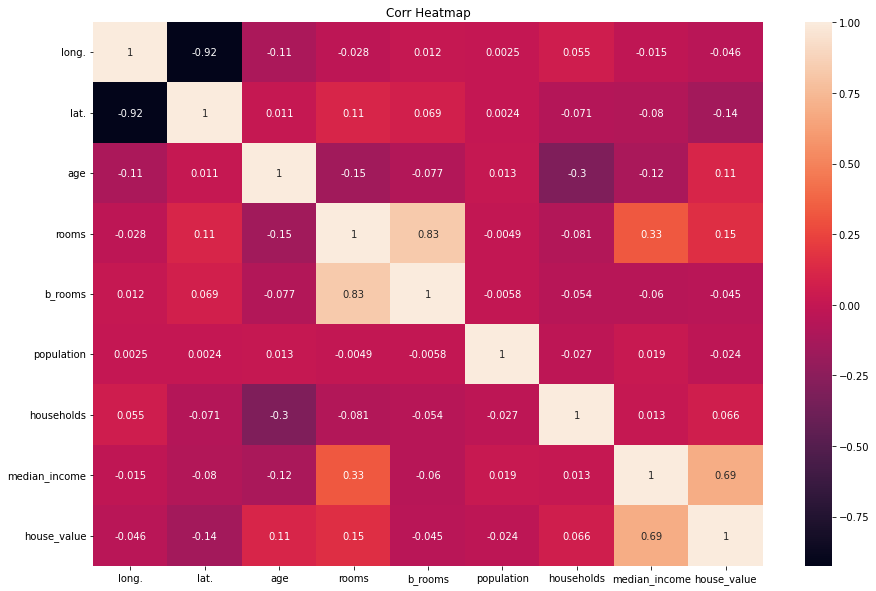

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True)
plt.title("Corr Heatmap")
plt.show()

In [ ]:
# 目的変数（house_value）を y に代入し、
# 説明変数（その他の項目＝上記以外）を x に代入する
y=df[["house_value"]] # 賃料＋管理費
df=df.drop(["house_value"], axis=1)
x=df
print(x.head())
print(y.head())

    long.   lat.  age     rooms   b_rooms  population  households  \
0 -122.23  37.88   41  6.984127  1.023810    2.555556         126   
1 -122.22  37.86   21  6.238137  0.971880    2.109842        1138   
2 -122.24  37.85   52  8.288136  1.073446    2.802260         177   
3 -122.25  37.85   52  5.817352  1.073059    2.547945         219   
4 -122.25  37.85   52  6.281853  1.081081    2.181467         259   

   median_income  
0         8.3252  
1         8.3014  
2         7.2574  
3         5.6431  
4         3.8462  
   house_value
0       452600
1       358500
2       352100
3       341300
4       342200


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print(len(x_train))
print(len(x_test))

14448
6192


In [ ]:
print(x_train.head())
print(x_test.head())

       long.   lat.  age     rooms   b_rooms  population  households  \
1989 -119.79  36.73   52  2.800000  0.700000    4.825000          40   
256  -122.21  37.77   43  3.671480  1.184116    3.018051         277   
7887 -118.04  33.87   17  6.478022  1.087912    3.810440         364   
4581 -118.28  34.06   17  2.518000  1.196000    3.051000        1000   
1993 -119.81  36.73   50  4.622754  1.161677    3.628743         167   

      median_income  
1989         1.9750  
256          2.2604  
7887         6.2990  
4581         1.7199  
1993         2.2206  
        long.   lat.  age     rooms   b_rooms  population  households  \
14740 -117.05  32.58   22  5.663073  1.075472    4.180593         371   
10101 -117.97  33.92   32  6.107226  0.927739    3.020979         429   
20566 -121.84  38.65   29  5.930712  1.026217    2.910112         534   
2670  -115.60  33.20   37  4.992958  1.316901    2.746479         142   
15709 -122.43  37.79   25  4.319261  1.039578    1.712401         379 

In [ ]:
# 深さ2の検索木 Tree で fit 学習する
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=0).fit(x_train,y_train)

[Text(0.5, 0.8333333333333334, 'X[7] <= 5.029\nsquared_error = 13308271915.829\nsamples = 14448\nvalue = 206824.625'),
 Text(0.25, 0.5, 'X[7] <= 3.067\nsquared_error = 8281492327.433\nsamples = 11381\nvalue = 173200.057'),
 Text(0.125, 0.16666666666666666, 'squared_error = 5448662662.114\nsamples = 5469\nvalue = 134959.229'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8297853090.516\nsamples = 5912\nvalue = 208575.409'),
 Text(0.75, 0.5, 'X[7] <= 7.815\nsquared_error = 12197644067.037\nsamples = 3067\nvalue = 331598.412'),
 Text(0.625, 0.16666666666666666, 'squared_error = 9567813656.976\nsamples = 2532\nvalue = 304009.079'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3992335434.158\nsamples = 535\nvalue = 462170.733')]

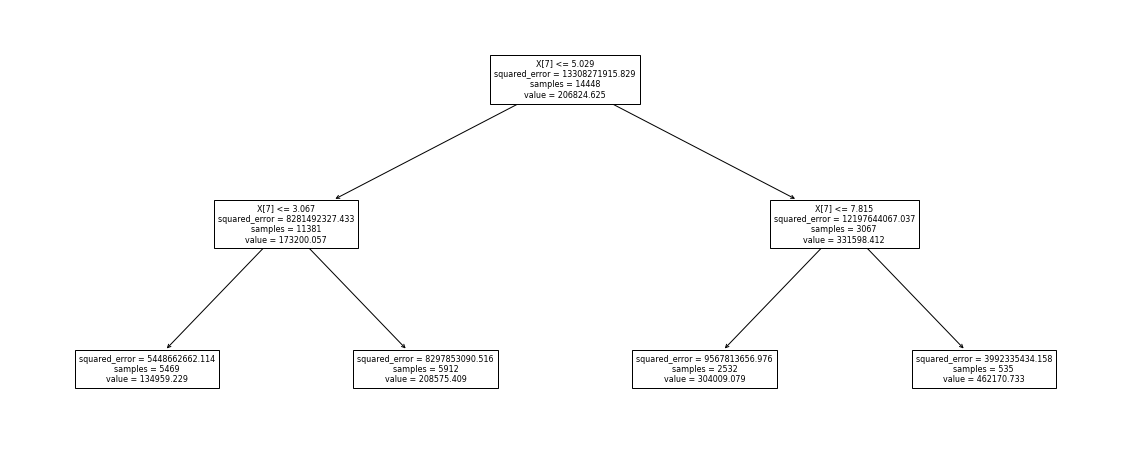

In [ ]:
# 検索木の構造と分岐条件を表示する
plt.figure(figsize=(20,8))
tree.plot_tree(tree_reg2,fontsize=8)

In [ ]:
# 検索木で学習したモデルを使い予測値を算出する
y_train_yosoku = tree_reg2.predict(x_train)
y_test_yosoku = tree_reg2.predict(x_test)

y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

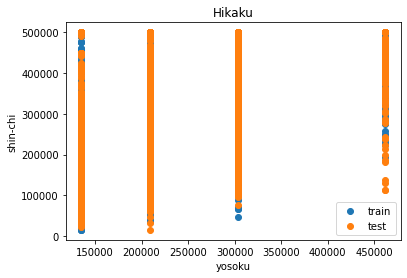

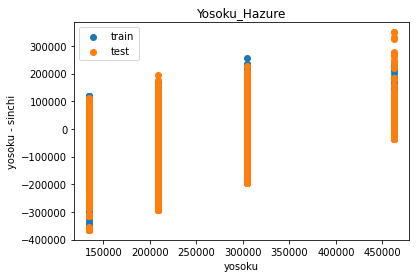

In [ ]:
# 予測値と真値の比較、予測値と外れ量の比較
cmp_plt(y_train_yosoku, y_train, y_test_yosoku, y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 64774.19942727988
 mean squared error = 7282478350.426852
 root mean squared error = 85337.43815247122
 R2(kettei keisuu) = 0.4527855760322177
Test data
 mean absolute error = 66552.54240019579
 mean squared error = 7708958506.415741
 root mean squared error = 87800.67486309966
 R2(kettei keisuu) = 0.4217862478232296


In [ ]:
# 検索木の深さを3にして、あらためて学習する
tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=0).fit(x_train,y_train)

[Text(0.5, 0.875, 'X[7] <= 5.029\nsquared_error = 13308271915.829\nsamples = 14448\nvalue = 206824.625'),
 Text(0.25, 0.625, 'X[7] <= 3.067\nsquared_error = 8281492327.433\nsamples = 11381\nvalue = 173200.057'),
 Text(0.125, 0.375, 'X[3] <= 4.216\nsquared_error = 5448662662.114\nsamples = 5469\nvalue = 134959.229'),
 Text(0.0625, 0.125, 'squared_error = 6559267844.343\nsamples = 2059\nvalue = 164116.085'),
 Text(0.1875, 0.125, 'squared_error = 3954805805.872\nsamples = 3410\nvalue = 117353.96'),
 Text(0.375, 0.375, 'X[5] <= 2.344\nsquared_error = 8297853090.516\nsamples = 5912\nvalue = 208575.409'),
 Text(0.3125, 0.125, 'squared_error = 12888750388.293\nsamples = 1297\nvalue = 281297.764'),
 Text(0.4375, 0.125, 'squared_error = 5103627300.512\nsamples = 4615\nvalue = 188137.512'),
 Text(0.75, 0.625, 'X[7] <= 7.815\nsquared_error = 12197644067.037\nsamples = 3067\nvalue = 331598.412'),
 Text(0.625, 0.375, 'X[5] <= 2.746\nsquared_error = 9567813656.976\nsamples = 2532\nvalue = 304009.079

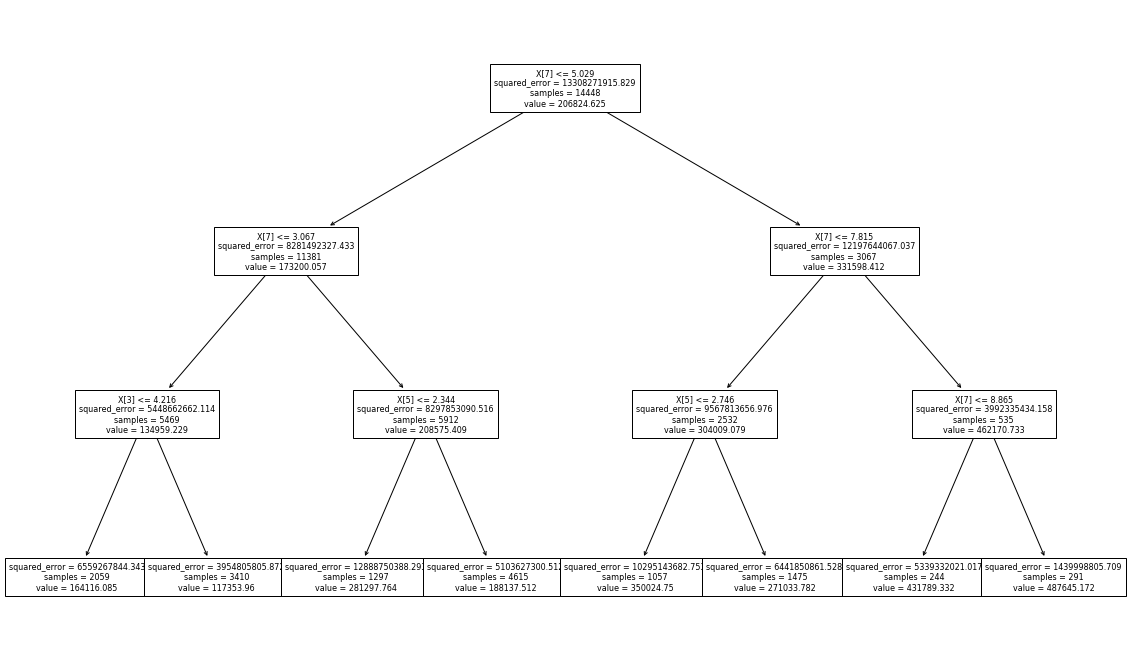

In [ ]:
# 検索木の構造と分岐条件を表示する
plt.figure(figsize=(20,12))
tree.plot_tree(tree_reg3,fontsize=8)

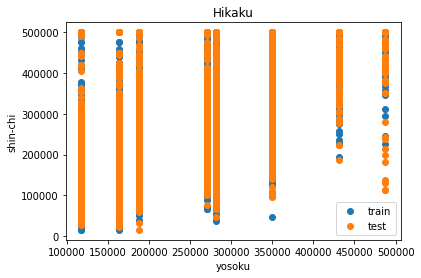

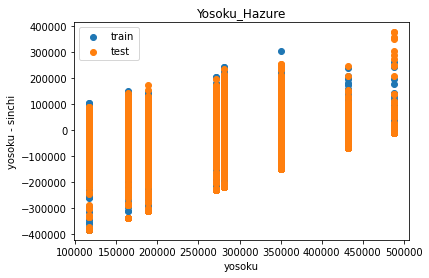

In [ ]:
# 検索木で学習したモデルを使い予測値を算出する
y_train_yosoku = tree_reg3.predict(x_train)
y_test_yosoku = tree_reg3.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

# 予測値と真値の比較、予測値と外れ量の比較
cmp_plt(y_train_yosoku, y_train, y_test_yosoku, y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 58698.101115026664
 mean squared error = 6185416880.815193
 root mean squared error = 78647.42132336694
 R2(kettei keisuu) = 0.5352201307625597
Test data
 mean absolute error = 60808.82818493232
 mean squared error = 6658517935.688692
 root mean squared error = 81599.74225258737
 R2(kettei keisuu) = 0.5005749951401735


In [ ]:
# 検索木の深さを4にして、あらためて学習する
tree_reg_d4 = DecisionTreeRegressor(max_depth=4, random_state=0).fit(x_train,y_train)

[Text(0.5, 0.9, 'X[7] <= 5.029\nsquared_error = 13308271915.829\nsamples = 14448\nvalue = 206824.625'),
 Text(0.25, 0.7, 'X[7] <= 3.067\nsquared_error = 8281492327.433\nsamples = 11381\nvalue = 173200.057'),
 Text(0.125, 0.5, 'X[3] <= 4.216\nsquared_error = 5448662662.114\nsamples = 5469\nvalue = 134959.229'),
 Text(0.0625, 0.3, 'X[5] <= 2.504\nsquared_error = 6559267844.343\nsamples = 2059\nvalue = 164116.085'),
 Text(0.03125, 0.1, 'squared_error = 10011417967.481\nsamples = 651\nvalue = 202530.439'),
 Text(0.09375, 0.1, 'squared_error = 3965394828.169\nsamples = 1408\nvalue = 146354.903'),
 Text(0.1875, 0.3, 'X[7] <= 2.415\nsquared_error = 3954805805.872\nsamples = 3410\nvalue = 117353.96'),
 Text(0.15625, 0.1, 'squared_error = 2815774555.602\nsamples = 1743\nvalue = 97426.565'),
 Text(0.21875, 0.1, 'squared_error = 4296426328.454\nsamples = 1667\nvalue = 138189.864'),
 Text(0.375, 0.5, 'X[5] <= 2.344\nsquared_error = 8297853090.516\nsamples = 5912\nvalue = 208575.409'),
 Text(0.3125

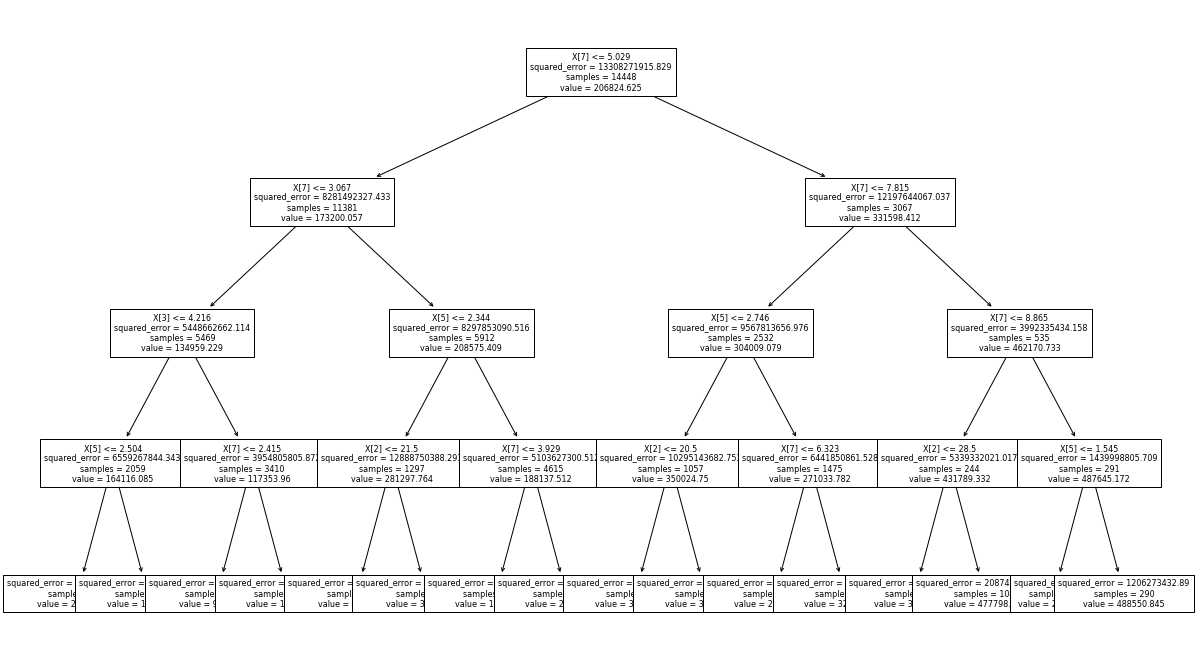

In [ ]:
# 検索木の構造と分岐条件を表示する
plt.figure(figsize=(20,12))
tree.plot_tree(tree_reg_d4,fontsize=8)

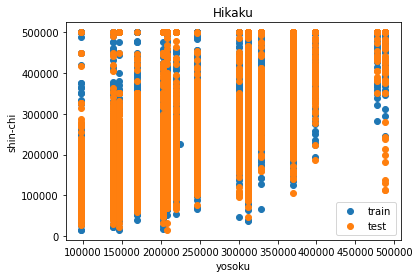

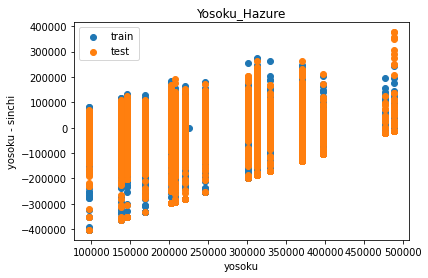

In [ ]:
# 検索木で学習したモデルを使い予測値を算出する
y_train_yosoku = tree_reg_d4.predict(x_train)
y_test_yosoku = tree_reg_d4.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 54346.879783746605
 mean squared error = 5449749845.901046
 root mean squared error = 73822.42102438152
 R2(kettei keisuu) = 0.590499061007376
Test data
 mean absolute error = 56499.81309581109
 mean squared error = 5936717696.270769
 root mean squared error = 77050.09861298537
 R2(kettei keisuu) = 0.5547139328979247


In [ ]:
# 検索木の深さを10にして、あらためて学習する
tree_reg10 = DecisionTreeRegressor(max_depth=10, random_state=0).fit(x_train,y_train)

# 検索木の構造と分岐条件を表示する
#plt.figure(figsize=(20,12))
#tree.plot_tree(tree_reg20,fontsize=8)

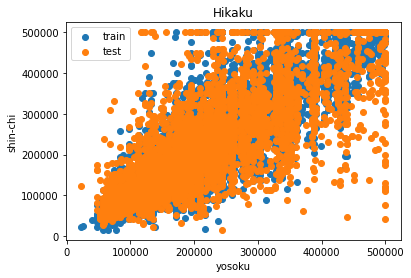

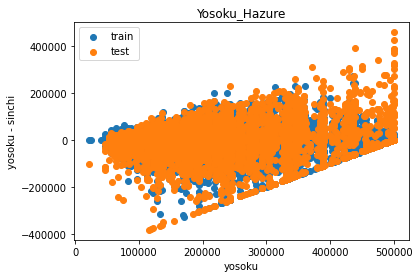

In [ ]:
y_train_yosoku = tree_reg10.predict(x_train)
y_test_yosoku = tree_reg10.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 32182.867643059104
 mean squared error = 2228037263.9453354
 root mean squared error = 47202.08961418271
 R2(kettei keisuu) = 0.8325825262635848
Test data
 mean absolute error = 44443.9360103693
 mean squared error = 4457268329.4710245
 root mean squared error = 66762.77652607794
 R2(kettei keisuu) = 0.6656806696913441


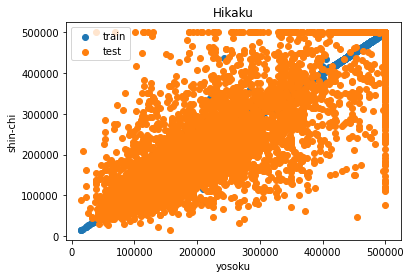

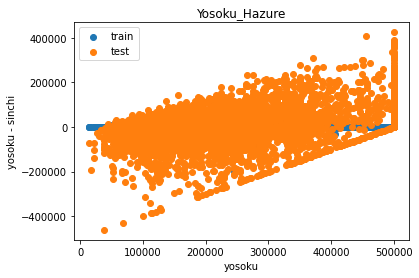

In [ ]:
# 検索木の深さを20にして、あらためて学習する
tree_reg20 = DecisionTreeRegressor(max_depth=20, random_state=0).fit(x_train,y_train)
y_train_yosoku = tree_reg20.predict(x_train)
y_test_yosoku = tree_reg20.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 2002.1039260866753
 mean squared error = 46931090.109314576
 root mean squared error = 6850.626986584117
 R2(kettei keisuu) = 0.9964735398851075
Test data
 mean absolute error = 47358.357294337
 mean squared error = 5423862437.039863
 root mean squared error = 73646.87662786429
 R2(kettei keisuu) = 0.5931808624470588


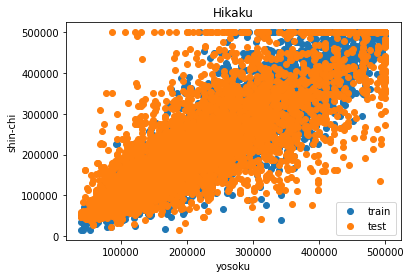

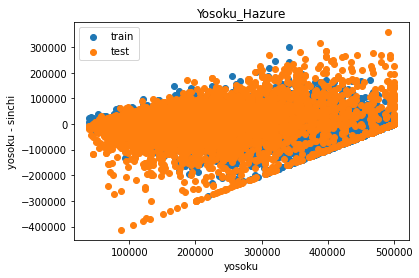

In [ ]:
# 検索木の最大深さを20、最小サンプル数を5に指定して学習
# 最小サンプル数を指定しない場合は自動的に1が設定されていた
tree_reg_sp5 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=0).fit(x_train,y_train)

y_train_yosoku = tree_reg_sp5.predict(x_train)
y_test_yosoku = tree_reg_sp5.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 22584.381392671345
 mean squared error = 1243013936.9414933
 root mean squared error = 35256.402779374606
 R2(kettei keisuu) = 0.9065983964857931
Test data
 mean absolute error = 42598.03614747559
 mean squared error = 4189523796.355582
 root mean squared error = 64726.530853704666
 R2(kettei keisuu) = 0.6857629636858772


ランダムフォレストモデル<br>
複数の決定木を生成させ、平均値や多数決等の方法で評価する<br>
これにより、過学習に陥りにくくなる

<ipython-input-35-db9142ea08b6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(x_train,y_train)


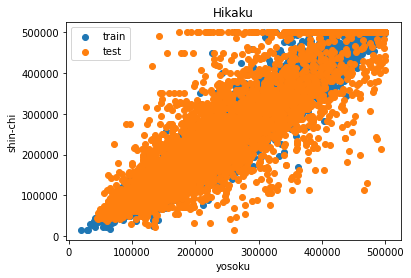

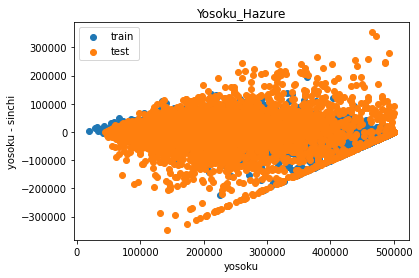

In [ ]:
# ランダムフォレストモデルで、決定木の数を10、最大深さを20で学習する
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(x_train,y_train)

y_train_yosoku = rf.predict(x_train)
y_test_yosoku = rf.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 14949.514693268935
 mean squared error = 558075014.7350415
 root mean squared error = 23623.611382154115
 R2(kettei keisuu) = 0.9580655536447771
Test data
 mean absolute error = 36098.005733845035
 mean squared error = 3053008354.9718275
 root mean squared error = 55254.03473930051
 R2(kettei keisuu) = 0.7710077937394351


<ipython-input-37-fefb0ae87502>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_n3 = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(x_train,y_train)


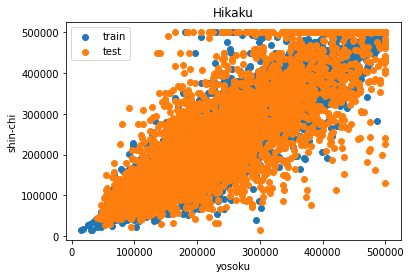

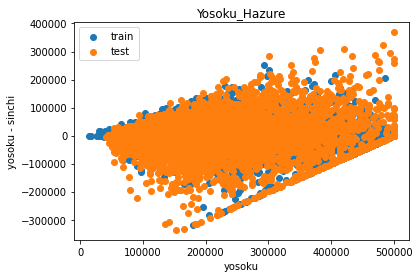

In [ ]:
# ランダムフォレストモデルで、決定木の数を3、最大深さを20で学習する
rf_n3 = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(x_train,y_train)

y_train_yosoku = rf_n3.predict(x_train)
y_test_yosoku = rf_n3.predict(x_test)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)

cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 予測誤差を評価する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 17639.594614634145
 mean squared error = 1001591320.5082858
 root mean squared error = 31647.927586309434
 R2(kettei keisuu) = 0.9247391902687981
Test data
 mean absolute error = 40779.673748330475
 mean squared error = 3710193700.8597436
 root mean squared error = 60911.35937458418
 R2(kettei keisuu) = 0.7217153238934509


交差検証法<br>
訓練データ（Train）と検証データ（Test）の分割領域を変えて学習し<br>
複数の学習結果を総合的に判断に利用する。

In [ ]:
# 交差検証法
rf_cv = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
rf_scores = cross_val_score(estimator=rf_cv, X=x, y=y, cv=k_fold, scoring="r2")

print(f"各分割のスコア：{rf_scores}")
print(f"平均のスコア：{np.mean(rf_scores)}")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

各分割のスコア：[0.61494279 0.65431918 0.63615534 0.65095676 0.66388702]
平均のスコア：0.6440522178849154


勾配ブースティング決定木<br>
ランダムフォレストでは、複数の決定木を並列に並べて評価していたが<br>
複数の決定木を直列に並べて評価する。<br>
XgBoost、LightGBM 等の手法がある。ここでは、前者を試す。


In [ ]:
xgb_rg = xgb.XGBRegressor(silent=True, random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
xgb_scores = cross_val_score(xgb_rg, x, y, cv=k_fold, scoring="r2")

print(f"各分割のスコア：{xgb_scores}")
print(f"平均のスコア：{np.mean(xgb_scores)}")

各分割のスコア：[0.78343043 0.7876449  0.79023438 0.79483454 0.78659013]
平均のスコア：0.7885468756982267
